In [41]:
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

from scipy import stats
from scipy.stats.distributions import beta
from scipy.special import beta as beta_func

import pymc3 as pm

import pandas as pd

import datetime

import seaborn as sns

from IPython.display import HTML


In [63]:
county= {'Del Norte': [206,784,411,376,269,337],
         'Humboldt':[153,76,1935,1379,1728,1652], 
         'Modoc':[0,0,404,499,503,546],
         'Shasta':[8,26,1037,693,862,756],
         'Siskiyou':[51,50,408,710,480,1109],
         'Trinity':[100,140,261,193,234,227],
         'Klamath':[1022,1081,0,0,0,0]}


year = [1860,1870,1880,1890,1900,1910]

In [64]:
county['Del Norte']

[206, 784, 411, 376, 269, 337]

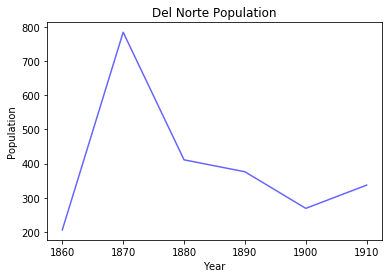

In [68]:

plt.plot(year, county['Del Norte'], color = 'blue', alpha = .6)
plt.xlabel('Year')
plt.ylabel('Population')
# plt.axvline(np.mean(age), color='darkred', linestyle='dashed', alpha=1,
#             linewidth=3, label='{}{}'.format('Average Age: ',round(np.mean(age))))
# plt.axvline(life_expectancy, color='k', linestyle='dashed', alpha=1,
#             linewidth=3, label='{}{}'.format('Life Expectancy ',life_expectancy))
plt.title('Del Norte Population')
plt.legend();
plt.show()

In [128]:
#modoc_siskiyou = [sum(x) for x in zip(county['Modoc'], county['Siskiyou'])]
all_counties = [sum(x) for x in zip(county['Del Norte'],
                                    county['Humboldt'], county['Modoc'],
                                    county['Shasta'], 
                                    county['Siskiyou'],
                                    county['Trinity'],
                                    county['Klamath'])]
all_counties

[1540, 2157, 4456, 3850, 4076, 4627]

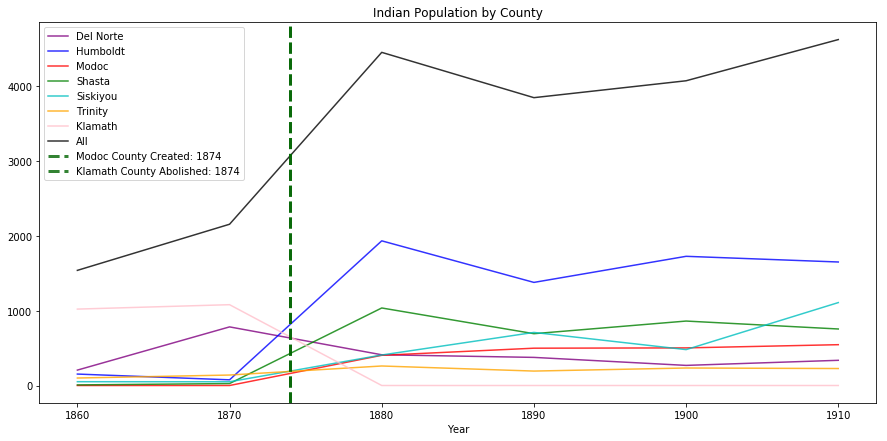

In [81]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Indian Population by County')
plt.xlabel('Year')
ax.plot(year, county['Del Norte'], color='purple', alpha = .8, label='Del Norte')
ax.plot(year, county['Humboldt'], color='b', alpha = .8, label = 'Humboldt')
ax.plot(year, county['Modoc'], color='r', alpha = .8, label='Modoc')
ax.plot(year, county['Shasta'], color='g', alpha = .8, label='Shasta')
ax.plot(year, county['Siskiyou'], color='c', alpha = .8, label='Siskiyou')
ax.plot(year, county['Trinity'], color='orange', alpha = .8, label='Trinity')
ax.plot(year, county['Klamath'], color='pink', alpha = .8, label='Klamath')
ax.plot(year, all_counties, color='black', alpha = .8, label='All')
plt.axvline(1874, color='darkgreen', linestyle='dashed', alpha=.8,
            linewidth=3, label='{}{}'.format('Modoc County Created: ',1874))
plt.axvline(1874, color='darkgreen', linestyle='dashed', alpha=.8,
            linewidth=3, label='{}{}'.format('Klamath County Abolished: ',1874))

plt.legend()
plt.show()

In [38]:
modoc_siskiyou = 1

In [39]:
[county['Modoc'][i] + county['Siskiyou'][i] for i in range(len(county['Del Norte']))]

[51, 50, 812, 1209, 983, 1655]

In [40]:
modoc_siskiyou =list( map(add, county['Modoc'], county['Siskiyou']) )

[51, 50, 812, 1209, 983, 1655]

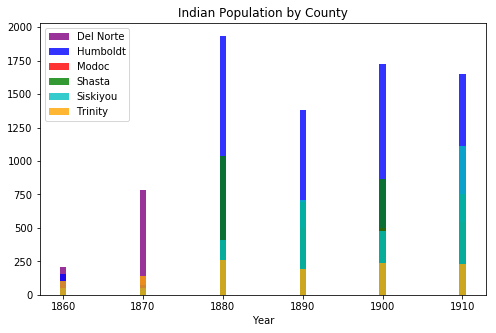

In [60]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title('Indian Population by County')
plt.xlabel('Year')
ax.bar(year, county['Del Norte'], color='purple', alpha = .8, label='Del Norte')
ax.bar(year, county['Humboldt'], color='b', alpha = .8, label = 'Humboldt')
ax.bar(year, county['Modoc'], color='r', alpha = .8, label='Modoc')
ax.bar(year, county['Shasta'], color='g', alpha = .8, label='Shasta')
ax.bar(year, county['Siskiyou'], color='c', alpha = .8, label='Siskiyou')
ax.bar(year, county['Trinity'], color='orange', alpha = .8, label='Trinity')
#ax.bar(year, all_counties, color='black', alpha = .8, label='All')
plt.legend()
plt.show()

In [83]:
sns.factorplot(x='class', y='survival rate', hue='sex', data=df, kind='bar')

NameError: name 'df' is not defined

In [136]:
county_df= {'Year' : [1860,1870,1880,1890,1900,1910],
            'Del Norte': [206,784,411,376,269,337],
            'Humboldt':[153,76,1935,1379,1728,1652], 
            'Modoc':[0,0,404,499,503,546],
            'Shasta':[8,26,1037,693,862,756],
            'Siskiyou':[51,50,408,710,480,1109],
            'Trinity':[100,140,261,193,234,227],
            'Klamath':[1022,1081,0,0,0,0],
            'All Counties' : all_counties}

df = pd.DataFrame (county_df, columns = list(county_df.keys()))

In [137]:
df

,Year,Del Norte,Humboldt,Modoc,Shasta,Siskiyou,Trinity,Klamath,All Counties
0,1860,206,153,0,8,51,100,1022,1540
1,1870,784,76,0,26,50,140,1081,2157
2,1880,411,1935,404,1037,408,261,0,4456
3,1890,376,1379,499,693,710,193,0,3850
4,1900,269,1728,503,862,480,234,0,4076
5,1910,337,1652,546,756,1109,227,0,4627


In [138]:
df = pd.melt(df, id_vars="Year", var_name="County", value_name="Population")
df

,Year,County,Population
0,1860,Del Norte,206
1,1870,Del Norte,784
2,1880,Del Norte,411
3,1890,Del Norte,376
4,1900,Del Norte,269
5,1910,Del Norte,337
6,1860,Humboldt,153
7,1870,Humboldt,76
8,1880,Humboldt,1935
9,1890,Humboldt,1379


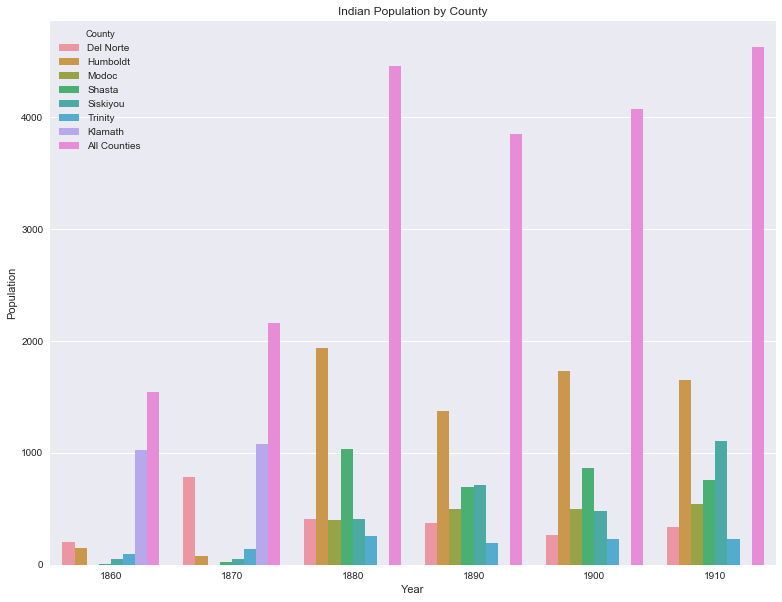

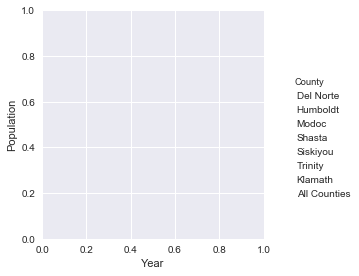

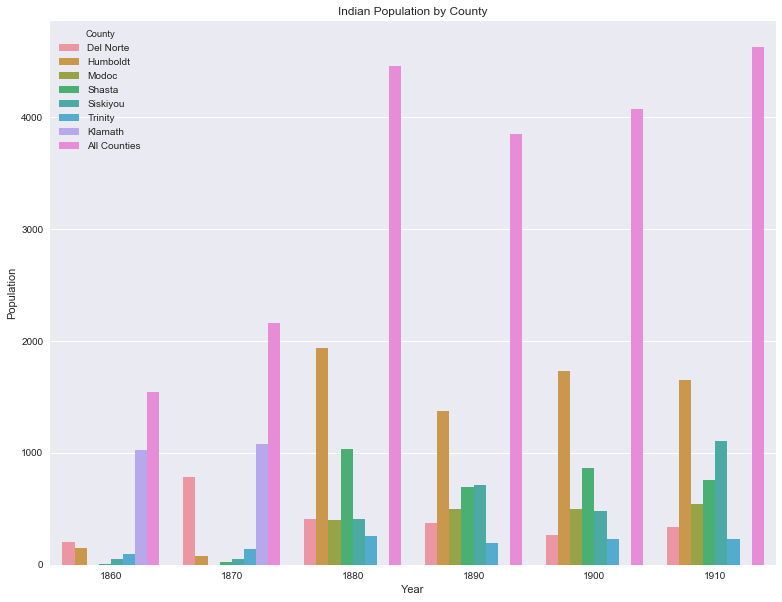

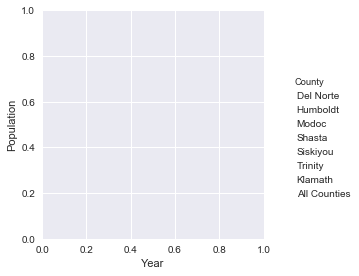

In [155]:
fig, ax = plt.subplots(figsize=(13,10))

sns.factorplot(x='Year', y='Population', hue='County', data=df, kind='bar', ax=ax)
sns.despine()
ax.set_title('Indian Population by County')
plt.show()

In [135]:
list(county_df.keys())

['Del Norte',
 'Humboldt',
 'Modoc',
 'Shasta',
 'Siskiyou',
 'Trinity',
 'Klamath',
 'Year']